<a href="https://colab.research.google.com/github/wiemila/ML_ISE-strzykawki/blob/main/PCA_peptydy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Loading all necessary libraries to start the analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [25]:
from google.colab import files
uploaded = files.upload()


Saving Baza danych peptydy_krotkie.csv to Baza danych peptydy_krotkie (1).csv


### Read a csv file (from the same folder as the Jupyter notebook) and make a pandas dataframe out of it

In [26]:
import io
data = pd.read_csv(io.BytesIO(uploaded['Baza danych peptydy_krotkie (1).csv']),delimiter=';')

#### Show the dataframe

In [27]:
data


,Name,Type,Powtórzenie,pH,Jest lek,Jest Cu,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 275,Unnamed: 276,Unnamed: 277,Unnamed: 278,Unnamed: 279,Unnamed: 280,Unnamed: 281,Unnamed: 282,Unnamed: 283,Unnamed: 284
0,TDMQ20 pH 3,1,1,3,1,0,1.230000e-06,1.920000e-06,1.930000e-06,1.930000e-06,...,0.000035,0.000035,0.000036,0.000036,0.000036,0.000037,0.000037,0.000038,0.000038,0.000039
1,TDMQ20 pH 3,1,2,3,1,0,1.200000e-06,1.770000e-06,1.780000e-06,1.780000e-06,...,0.000034,0.000034,0.000034,0.000035,0.000035,0.000036,0.000036,0.000036,0.000037,0.000037
2,TDMQ20 pH 3,1,3,3,1,0,1.260000e-06,1.990000e-06,2.010000e-06,2.010000e-06,...,0.000034,0.000034,0.000035,0.000035,0.000036,0.000036,0.000036,0.000037,0.000037,0.000038
3,TDMQ20 pH 3,1,4,3,1,0,1.210000e-06,1.760000e-06,1.770000e-06,1.770000e-06,...,0.000030,0.000030,0.000031,0.000031,0.000031,0.000032,0.000032,0.000032,0.000033,0.000033
4,TDMQ20 pH 4,2,1,4,1,0,1.340000e-06,2.060000e-06,2.090000e-06,2.110000e-06,...,0.000058,0.000059,0.000060,0.000061,0.000062,0.000063,0.000063,0.000064,0.000065,0.000066
5,TDMQ20 pH 4,2,2,4,1,0,1.360000e-06,2.120000e-06,2.160000e-06,2.180000e-06,...,0.000061,0.000062,0.000063,0.000064,0.000065,0.000066,0.000067,0.000068,0.000069,0.000070
6,TDMQ20 pH 4,2,3,4,1,0,1.360000e-06,2.170000e-06,2.200000e-06,2.220000e-06,...,0.000062,0.000063,0.000064,0.000065,0.000066,0.000067,0.000068,0.000069,0.000070,0.000071
7,TDMQ20 pH 4,2,4,4,1,0,1.420000e-06,2.410000e-06,2.450000e-06,2.470000e-06,...,0.000062,0.000063,0.000064,0.000066,0.000067,0.000068,0.000069,0.000070,0.000071,0.000072
8,TDMQ20 pH 5,3,1,5,1,0,1.370000e-06,2.100000e-06,2.140000e-06,2.170000e-06,...,0.000056,0.000056,0.000057,0.000057,0.000058,0.000058,0.000059,0.000060,0.000060,0.000061
9,TDMQ20 pH 5,3,2,5,1,0,1.330000e-06,1.930000e-06,1.970000e-06,2.000000e-06,...,0.000054,0.000054,0.000055,0.000056,0.000056,0.000057,0.000057,0.000058,0.000058,0.000059


In [95]:
X = data.iloc[:,6:].values
X

array([[1.23e-06, 1.92e-06, 1.93e-06, ..., 3.76e-05, 3.80e-05, 3.85e-05],
       [1.20e-06, 1.77e-06, 1.78e-06, ..., 3.64e-05, 3.68e-05, 3.72e-05],
       [1.26e-06, 1.99e-06, 2.01e-06, ..., 3.67e-05, 3.72e-05, 3.77e-05],
       ...,
       [1.76e-06, 2.98e-06, 3.06e-06, ..., 7.49e-05, 7.54e-05, 7.60e-05],
       [1.75e-06, 2.85e-06, 2.93e-06, ..., 7.39e-05, 7.46e-05, 7.51e-05],
       [1.76e-06, 2.56e-06, 2.65e-06, ..., 6.88e-05, 6.95e-05, 7.01e-05]])

### Let us check how the data will look like after preprocessing.

In [31]:
from sklearn.preprocessing import StandardScaler, normalize;

# Scaling the data so that all the features become comparable
sc = StandardScaler();
data_sc = sc.fit_transform(X);

# Normalizing the data so that the data approximately
# follows a Gaussian distribution
data_sc_normalized = normalize(X)

# Converting the numpy array into a pandas DataFrame
df_sc_normalized = pd.DataFrame(X)
df_sc = pd.DataFrame(X)

## k-means

Here we run k-means with different number of clusters from 1 to 13, because we have 13 variables, if you will apply this to other data you can change the max number

### Random initialization

### K-means++ initialization

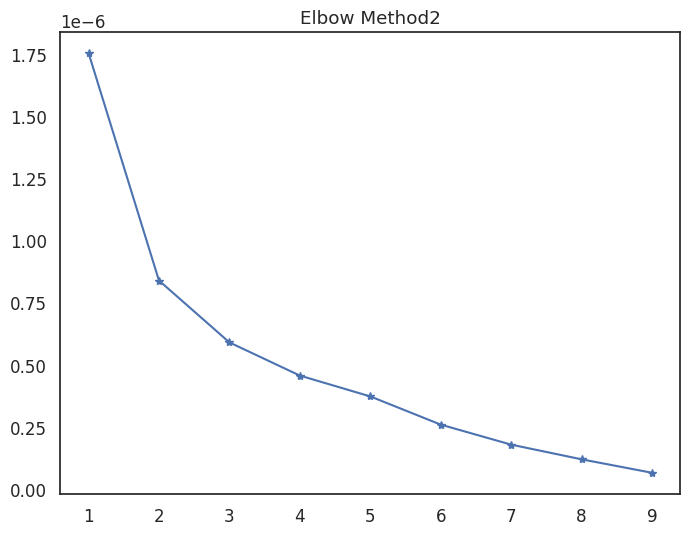

In [96]:
ints=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init="k-means++", n_init=5)
    kmeans.fit(df_sc)
    ints.append(kmeans.inertia_)

# Elbow plot
plt.figure(figsize=(8,6))
plt.plot(range(1,10),ints, marker="*")
plt.title("Elbow Method2")
plt.show()

### Choose the number of clusters based on the elbow plot (e.g. 4) and run KMeans again

In [97]:
kmeans=KMeans(n_clusters=12,init="k-means++", n_init=10)
kmeans.fit(df_sc)
ints.append(kmeans.inertia_)

### Show cluster label for each sample

In [98]:
label = kmeans.fit_predict(X)
print(label)

[ 9  9  9  9  3  3  3  3  4  4  4  4 10 10 10 10  0  0  0  0  6  6  6  6
  2  2  2  2 11 11 11 11  8  8  8  8  5  5  5  5  7  7  7  7  1  1  1  1]


In [99]:
kmeans_pred = pd.DataFrame(label)
kmeans_pred

,0
0,9
1,9
2,9
3,9
4,3
5,3
6,3
7,3
8,4
9,4


## PCA Principal Component Analysis

The number of components cannot be greater than the number of variables.
As data you should use scaled or normalized data, but you can play also with the original data set to see how it changes.

In [94]:
pca = PCA(n_components=13)
pca.fit(data_sc_normalized)

PCA(n_components=13)

Let us plot how much information is given by each component

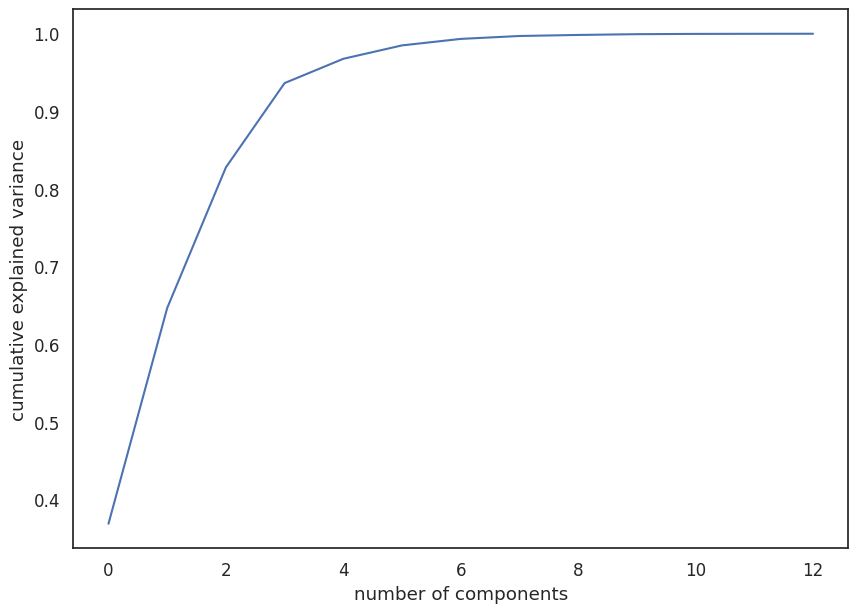

In [85]:
plt.figure(figsize=(10, 7))

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [86]:
pca.explained_variance_ratio_

array([3.69083398e-01, 2.77739810e-01, 1.81116992e-01, 1.08503280e-01,
       3.12572165e-02, 1.72557620e-02, 8.35655840e-03, 3.75929070e-03,
       1.32963367e-03, 9.96235637e-04, 3.54006683e-04, 1.30988042e-04,
       6.41683939e-05])

Now we can analyze the loadings plot

<ipython-input-87-b9fcc34e3ad8>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca.components_[0,:],pca.components_[1,:],cmap='Set1')


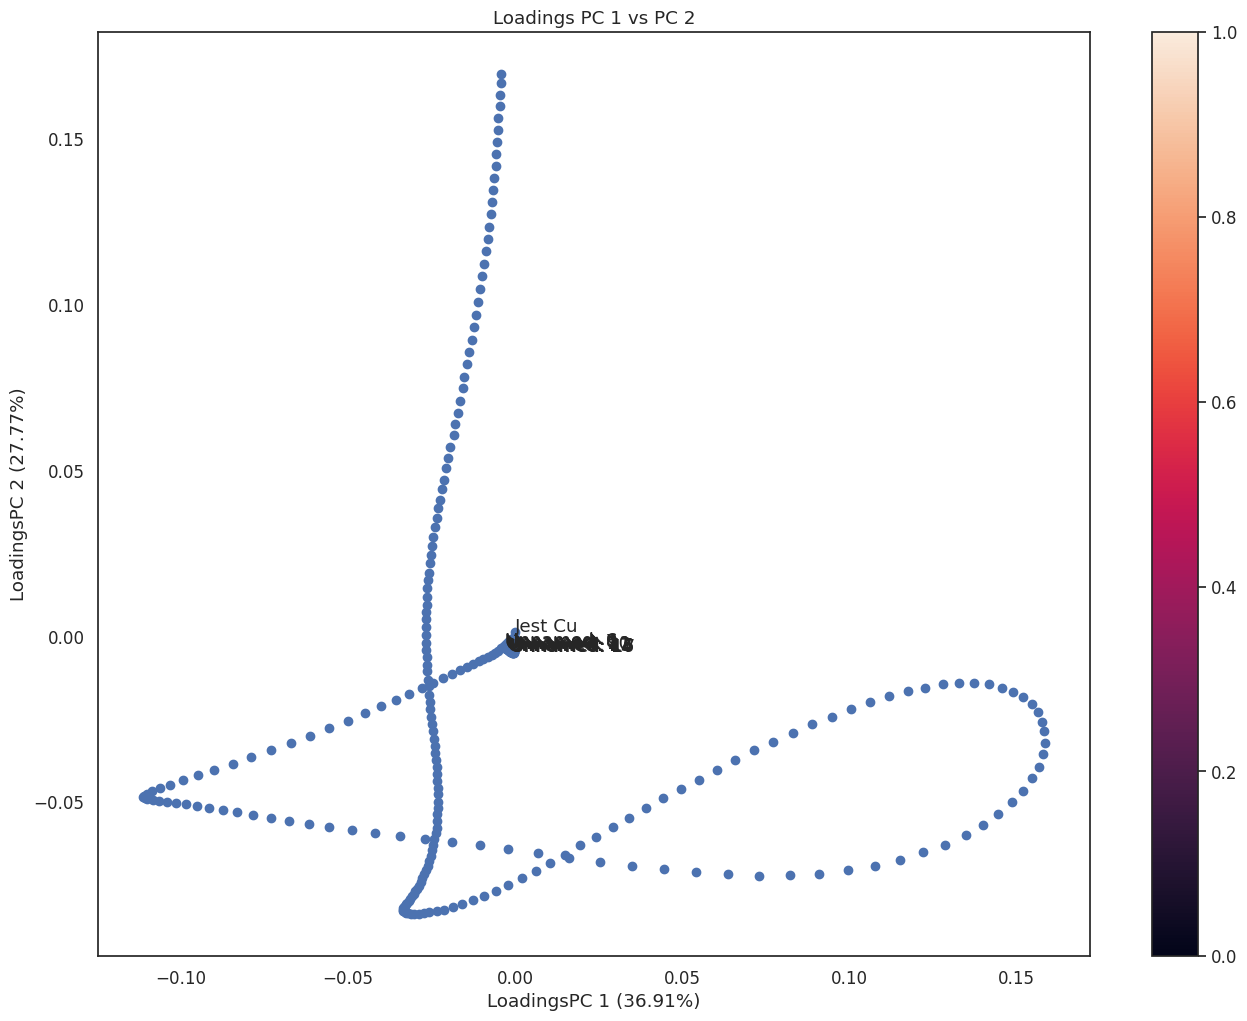

In [87]:
name = data.columns[5:18]
plt.figure(figsize=(16,12))
plt.scatter(pca.components_[0,:],pca.components_[1,:],cmap='Set1')
plt.title('Loadings PC 1 vs PC 2')
plt.xlabel('LoadingsPC 1 (%.2f%%)' % (pca.explained_variance_ratio_[0]*100))
plt.ylabel('LoadingsPC 2 (%.2f%%)' % (pca.explained_variance_ratio_[1]*100))
for i, txt in enumerate(name):
    plt.annotate(txt, (pca.components_[0,:][i],pca.components_[1,:][i]))
plt.colorbar();

In [90]:
loadings_pca = pd.DataFrame(pca.components_[1,:])
loadings_pca

,0
0,0.001441
1,-0.002745
2,-0.003007
3,-0.003239
4,-0.003481
...,...
274,0.156094
275,0.159851
276,0.163063
277,0.166662


In [93]:
scores_pca = pd.DataFrame(x_pca[:,1])
scores_pca

,0
0,-0.000032
1,-0.000031
2,-0.000032
3,-0.000029
4,-0.000028
5,-0.000028
6,-0.000028
7,-0.000026
8,0.000010
9,0.000009


Finally we can plot Scores, that is our data in the new dataspace

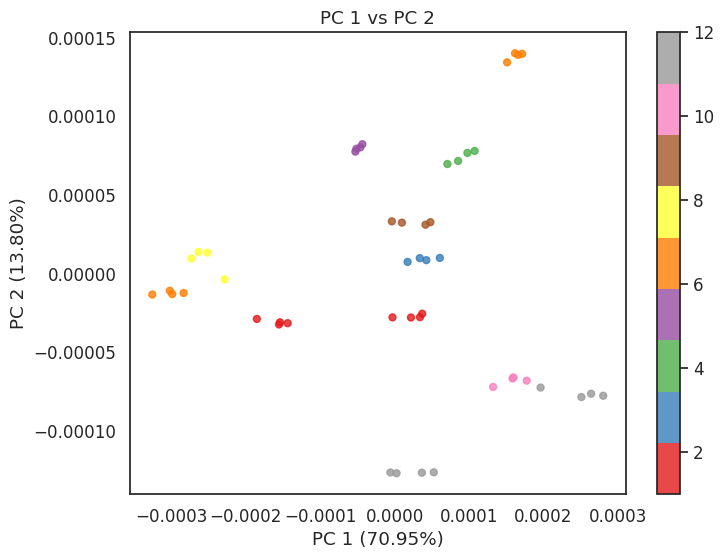

In [80]:
x_pca = pca.transform(X)
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],cmap='Set1', s = 100,  c=data['Type'], alpha = 0.8, marker = '.')
plt.title('PC 1 vs PC 2')
plt.xlabel('PC 1 (%.2f%%)' % (pca.explained_variance_ratio_[0]*100))
plt.ylabel('PC 2 (%.2f%%)' % (pca.explained_variance_ratio_[1]*100))

plt.colorbar();